In [112]:
import pandas as pd      #When it comes to data, pandas is a must and so thats why we have it here
import matplotlib.pyplot as plt  #I love graphs and plot them so just importing this as I can't stop my hands doing it
import seaborn as sns    #Maybe I would do some visualization though for the first question it is not needed I guesss
import numpy as np       #Linear algebra is not so lianear but needed for almost everything  
import nltk              #This is the life saver here for understanding my sentiments
import random
import math
import gensim
import re
import spacy
from lxml import *
from nltk.corpus import *
from nltk import*
from nltk.corpus import *
from gensim.corpora.dictionary import *
from gensim.models.ldamodel import *
from gensim.models import *
from gensim.corpora import *
from gensim.models.coherencemodel import *
from wordcloud import *

<h1>Data Acquasition

<b>Importing the true data news dataset 

In [25]:
true_news= pd.read_csv('/Users/vinamrasharma/Downloads/archive-3/DataSet_Misinfo_TRUE.csv') #importing the file in the notebook 

In [26]:
print(true_news.describe)

<bound method NDFrame.describe of        Unnamed: 0                                               text
0               0  The head of a conservative Republican faction ...
1               1  Transgender people will be allowed for the fir...
2               2  The special counsel investigation of links bet...
3               3  Trump campaign adviser George Papadopoulos tol...
4               4  President Donald Trump called on the U.S. Post...
...           ...                                                ...
34970       34970  Most conservatives who oppose marriage equalit...
34971       34971  The freshman senator from Georgia quoted scrip...
34972       34972  The State Department told the Republican Natio...
34973       34973  ADDIS ABABA, Ethiopia —President Obama convene...
34974       34974  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[34975 rows x 2 columns]>


In [27]:
true_news.head(10)

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...
5,5,The White House said on Friday it was set to k...
6,6,President Donald Trump said on Thursday he bel...
7,7,While the Fake News loves to talk about my so-...
8,8,"Together, we are MAKING AMERICA GREAT AGAIN! b..."
9,9,Alabama Secretary of State John Merrill said h...


In [28]:
#Before Pre-Processing Let's have a look into the data statics of Truth 
print("________________________________________________________________________________________________")
print("The Number of rows or you can say data we have in our data set-->", len(true_news))
print("The Columns we have are as follows-->",true_news.columns.tolist())
print("So we have",len(true_news.columns.tolist()),"number of coulmns")
print("We will be working on the 'text' column here further")
print("The avrage length of the text before pre processing",true_news['text'].fillna('').apply(len).mean())
print("The Min length",true_news['text'].fillna('').apply(len).min())
print("The Max length",true_news['text'].fillna('').apply(len).max())
print("_________________________________________________________________________________________________")

________________________________________________________________________________________________
The Number of rows or you can say data we have in our data set--> 34975
The Columns we have are as follows--> ['Unnamed: 0', 'text']
So we have 2 number of coulmns
We will be working on the 'text' column here further
The avrage length of the text before pre processing 3221.166118656183
The Min length 0
The Max length 85948
_________________________________________________________________________________________________


<b>Importing the False data news dataset 

In [29]:
false_news=pd.read_csv('/Users/vinamrasharma/Downloads/archive-3/DataSet_Misinfo_FAKE.csv')

In [30]:
print(false_news.describe)

<bound method NDFrame.describe of        Unnamed: 0                                               text
0               0  Donald Trump just couldn t wish all Americans ...
1               1  House Intelligence Committee Chairman Devin Nu...
2               2  On Friday, it was revealed that former Milwauk...
3               3  On Christmas day, Donald Trump announced that ...
4               4  Pope Francis used his annual Christmas Day mes...
...           ...                                                ...
43637       44422  The USA wants to divide Syria.\r\n\r\nGreat Br...
43638       44423  The Ukrainian coup d'etat cost the US nothing ...
43639       44424  The European Parliament falsifies history by d...
43640       44425  The European Parliament falsifies history by d...
43641       44426  A leading FSB officer, Segey Beseda, said duri...

[43642 rows x 2 columns]>


In [31]:
false_news.head(10)

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...
5,5,The number of cases of cops brutalizing and ki...
6,6,Donald Trump spent a good portion of his day a...
7,7,In the wake of yet another court decision that...
8,8,Many people have raised the alarm regarding th...
9,9,Just when you might have thought we d get a br...


In [32]:
#Before Pre-Processing Let's have a look into the data statics of False 
print("________________________________________________________________________________________________")
print("The Number of rows or you can say data we have in our data set-->", len(false_news))
print("The Columns we have are as follows-->",false_news.columns.tolist())
print("So we have",len(false_news.columns.tolist()),"number of coulmns")
print("We will be working on the 'text' column here further")
print("The avrage length of the text before pre processing",true_news['text'].fillna('').apply(len).mean())
print("The Min length",false_news['text'].fillna('').apply(len).min())
print("The Max length",false_news['text'].fillna('').apply(len).max())
print("_________________________________________________________________________________________________")

________________________________________________________________________________________________
The Number of rows or you can say data we have in our data set--> 43642
The Columns we have are as follows--> ['Unnamed: 0', 'text']
So we have 2 number of coulmns
We will be working on the 'text' column here further
The avrage length of the text before pre processing 3221.166118656183
The Min length 1
The Max length 142961
_________________________________________________________________________________________________


<b>Dropping the extra column from both True and Fake news dataset

In [33]:
true_news=true_news.drop('Unnamed: 0',axis=1)
false_news=false_news.drop('Unnamed: 0',axis=1)

In [34]:
print(true_news.info)
print(false_news.info)

<bound method DataFrame.info of                                                     text
0      The head of a conservative Republican faction ...
1      Transgender people will be allowed for the fir...
2      The special counsel investigation of links bet...
3      Trump campaign adviser George Papadopoulos tol...
4      President Donald Trump called on the U.S. Post...
...                                                  ...
34970  Most conservatives who oppose marriage equalit...
34971  The freshman senator from Georgia quoted scrip...
34972  The State Department told the Republican Natio...
34973  ADDIS ABABA, Ethiopia —President Obama convene...
34974  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[34975 rows x 1 columns]>
<bound method DataFrame.info of                                                     text
0      Donald Trump just couldn t wish all Americans ...
1      House Intelligence Committee Chairman Devin Nu...
2      On Friday, it was revealed that former Milwauk.

<b>Addind an extra column in both the dataset that we might later use for binary classification

In [37]:
true_news = true_news.assign(T_F_Score=1)

In [38]:
false_news = false_news.assign(T_F_Score=0)

In [39]:
true_news

,text,T_F_Score
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
...,...,...
34970,Most conservatives who oppose marriage equalit...,1
34971,The freshman senator from Georgia quoted scrip...,1
34972,The State Department told the Republican Natio...,1
34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [40]:
false_news

,text,T_F_Score
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
43637,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
43638,The Ukrainian coup d'etat cost the US nothing ...,0
43639,The European Parliament falsifies history by d...,0
43640,The European Parliament falsifies history by d...,0


<b>Combining both together as a single data frame named Data

In [41]:
Data = pd.concat([true_news, false_news], ignore_index=True)

In [43]:
Data.info 

<bound method DataFrame.info of                                                     text  T_F_Score
0      The head of a conservative Republican faction ...          1
1      Transgender people will be allowed for the fir...          1
2      The special counsel investigation of links bet...          1
3      Trump campaign adviser George Papadopoulos tol...          1
4      President Donald Trump called on the U.S. Post...          1
...                                                  ...        ...
78612  The USA wants to divide Syria.\r\n\r\nGreat Br...          0
78613  The Ukrainian coup d'etat cost the US nothing ...          0
78614  The European Parliament falsifies history by d...          0
78615  The European Parliament falsifies history by d...          0
78616  A leading FSB officer, Segey Beseda, said duri...          0

[78617 rows x 2 columns]>

<h1>Data Cleaning Time

<>

In [49]:
#Starting by convering everything to lowercase
Data['text'] = Data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()) if isinstance(x, str) else x)

In [50]:
Data.text

0        the head of a conservative republican faction ...
1        transgender people will be allowed for the fir...
2        the special counsel investigation of links bet...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called on the u.s. post...
                               ...                        
78612    the usa wants to divide syria. great britain, ...
78613    the ukrainian coup d'etat cost the us nothing ...
78614    the european parliament falsifies history by d...
78615    the european parliament falsifies history by d...
78616    a leading fsb officer, segey beseda, said duri...
Name: text, Length: 78617, dtype: object

In [51]:
#removing all non-word and non-space characters
Data['text']= Data['text'].str.replace('[^\w\s]','')
print(Data.text)

/var/folders/ws/_qk1s1w50415ypbj7x1k0cjw0000gn/T/ipykernel_1416/3849678353.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['text']= Data['text'].str.replace('[^\w\s]','')


0        the head of a conservative republican faction ...
1        transgender people will be allowed for the fir...
2        the special counsel investigation of links bet...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called on the us postal...
                               ...                        
78612    the usa wants to divide syria great britain fr...
78613    the ukrainian coup detat cost the us nothing o...
78614    the european parliament falsifies history by d...
78615    the european parliament falsifies history by d...
78616    a leading fsb officer segey beseda said during...
Name: text, Length: 78617, dtype: object


In [53]:
nltk.download('stopwords') #Let's download the nltk sub flyers

','.join(stopwords.words('english')) #let's see what stopwords look like in english, beautifully seprating them with a comma 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinamrasharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [55]:
S1=set(stopwords.words('english')) #having them all as a set in the variable S1
#writing this function to remove stopwords which I will later apply to all the columns 
def Remove_Stopwords(x):                                                           #function to remove the stop words
    return " ".join([word for word in str(x).split() if word not in S1])   #here x will be every element of my column text

In [56]:
Data['text']=Data['text'].apply(lambda x:Remove_Stopwords(x)) #Calling my function so that will work for all the columns and also then saving it to the text 

In [57]:
Data.text

0        head conservative republican faction us congre...
1        transgender people allowed first time enlist u...
2        special counsel investigation links russia pre...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called us postal servic...
                               ...                        
78612    usa wants divide syria great britain france ge...
78613    ukrainian coup detat cost us nothing nearly no...
78614    european parliament falsifies history declarin...
78615    european parliament falsifies history declarin...
78616    leading fsb officer segey beseda said summit i...
Name: text, Length: 78617, dtype: object

In [58]:
#There are few dupllicates so I am just removing them
Data = Data.drop_duplicates(subset=['text'])

In [59]:
Data.text

0        head conservative republican faction us congre...
1        transgender people allowed first time enlist u...
2        special counsel investigation links russia pre...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called us postal servic...
                               ...                        
78611    apparently new kyiv government hurry turn natu...
78612    usa wants divide syria great britain france ge...
78613    ukrainian coup detat cost us nothing nearly no...
78614    european parliament falsifies history declarin...
78616    leading fsb officer segey beseda said summit i...
Name: text, Length: 68552, dtype: object

In [64]:
#I am also seeing a lot of white/empty spaces here, let's remove them as well (Ps- Its as empty as me without a gf)
#I am not sure if its a good idea but I am sure it's not a bad one for just possibility
def Remove_empty(data):
    return data.strip()
Data['text']=Data['text'].apply(lambda x:Remove_empty(x)) #Calling my function

/var/folders/ws/_qk1s1w50415ypbj7x1k0cjw0000gn/T/ipykernel_1416/665432226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['text']=Data['text'].apply(lambda x:Remove_empty(x)) #Calling my function


In [65]:
Data.text

0        head conservative republican faction us congre...
1        transgender people allowed first time enlist u...
2        special counsel investigation links russia pre...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called us postal servic...
                               ...                        
78611    apparently new kyiv government hurry turn natu...
78612    usa wants divide syria great britain france ge...
78613    ukrainian coup detat cost us nothing nearly no...
78614    european parliament falsifies history declarin...
78616    leading fsb officer segey beseda said summit i...
Name: text, Length: 68552, dtype: object

In [66]:
#Also I can see some links and random numbers in the text, lets remove them as well 
def Remove_lnk_num(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    return text

Data['text']=Data['text'].apply(lambda x: Remove_lnk_num(x))

/var/folders/ws/_qk1s1w50415ypbj7x1k0cjw0000gn/T/ipykernel_1416/660418011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['text']=Data['text'].apply(lambda x: Remove_lnk_num(x))


In [70]:
Data.text

0        head conservative republican faction us congre...
1        transgender people allowed first time enlist u...
2        special counsel investigation links russia pre...
3        trump campaign adviser george papadopoulos tol...
4        president donald trump called us postal servic...
                               ...                        
78611    apparently new kyiv government hurry turn natu...
78612    usa wants divide syria great britain france ge...
78613    ukrainian coup detat cost us nothing nearly no...
78614    european parliament falsifies history declarin...
78616    leading fsb officer segey beseda said summit i...
Name: text, Length: 68552, dtype: object

In [71]:
#Let's do lemmatization rather than just stemming so that my text have more meaanings than me atleast :-)
nltk.download('wordnet')
w_tk=nltk.tokenize.WhitespaceTokenizer()
lem=WordNetLemmatizer()
def lemma(x):                                              #I feel like I am becoming like a python function myself ;-0
    return [lem.lemmatize(w) for w in w_tk.tokenize(x)]
Data['text']=Data['text'].apply(lambda x: lemma(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vinamrasharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/ws/_qk1s1w50415ypbj7x1k0cjw0000gn/T/ipykernel_1416/1971072811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['text']=Data['text'].apply(lambda x: lemma(x))


In [73]:
Data.text

0        [head, conservative, republican, faction, u, c...
1        [transgender, people, allowed, first, time, en...
2        [special, counsel, investigation, link, russia...
3        [trump, campaign, adviser, george, papadopoulo...
4        [president, donald, trump, called, u, postal, ...
                               ...                        
78611    [apparently, new, kyiv, government, hurry, tur...
78612    [usa, want, divide, syria, great, britain, fra...
78613    [ukrainian, coup, detat, cost, u, nothing, nea...
78614    [european, parliament, falsifies, history, dec...
78616    [leading, fsb, officer, segey, beseda, said, s...
Name: text, Length: 68552, dtype: object

In [98]:
#After Pre-Processing Let's have a look into the data statics
print("______________________________________________________________________________")
print("The Number of rows or you can say tweets we have in our data set-->", len(Data))
print("Columns-->",Data.columns.tolist())
print("So we have",len(Data.columns.tolist()),"number of coulmns")
print("We will be working on the 'text' column here further")
print("The avrage length of the text before pre processing",Data['text'].apply(len).mean())
print("The Min length",Data['text'].apply(len).min())
print("The Max length",Data['text'].apply(len).max())
print("______________________________________________________________________________")

______________________________________________________________________________
The Number of rows or you can say tweets we have in our data set--> 68552
Columns--> ['text', 'T_F_Score']
So we have 2 number of coulmns
We will be working on the 'text' column here further
The avrage length of the text before pre processing 270.2800355934181
The Min length 0
The Max length 20644
______________________________________________________________________________


<AxesSubplot:title={'center':'Count of True and False News'}>

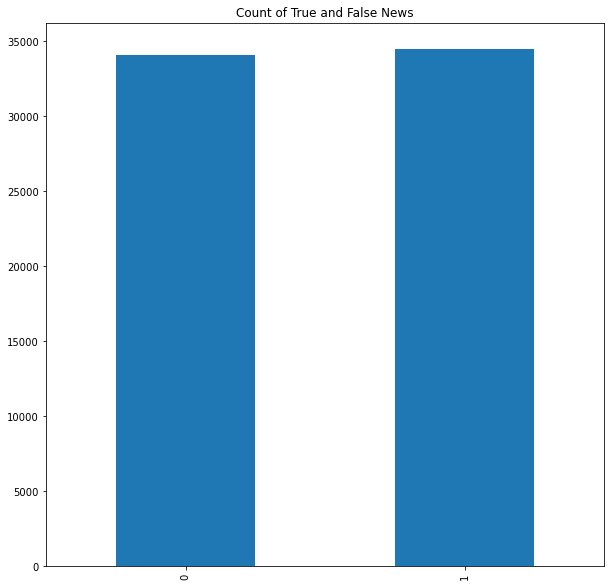

In [76]:
Data["T_F_Score"].value_counts().sort_index().plot(kind="bar",title="Count of True and False News",figsize=(10,10)) 

<b>Interesting Factors here</b><br>The distribution of false and true news is almost equal<br>0 represents false news and 1 represents true news

<h1>Topic Modeling Time :-)

In [105]:
#Let's make now bag of our words(unique words with the count)
D = Dictionary(Data['text'])

In [115]:
# Creating here a corpus of bag-of-words(nothing but just the frequency count)
corpus = [D.doc2bow(text) for text in Data['text']]

In [107]:
c_scores = []
possible_topics = [5, 10, 15, 20, 25,30,35,40,50]
for i in possible_topics:
    lda = LdaModel(corpus=corpus, num_topics=i, id2word=D,random_state=104, passes=10)
    coherence = CoherenceModel(model=lda, texts=Data['text'], dictionary=D, coherence='c_v')
    coherence_score = coherence.get_coherence()
    c_scores.append(coherence_score)

In [108]:
optimal_num_topics = possible_topics[c_scores.index(max(c_scores))]
print("\nThe Right Number of topics:",optimal_num_topics)


The Right Number of topics: 40


In [ ]:
#Finally lets do LDA for the right number of topics
lda = LdaModel(corpus=corpus, num_topics=optimal_num_topics, id2word=D,random_state=100, passes=10)
coherence = CoherenceModel(model=lda, texts=Data['text'], dictionary=D, coherence='c_v')
c_score = coherence.get_coherence()
print("So with 40 Topic the coherence we are getting is-->",c_score)

In [99]:
#Let's Find Perplexity as well (this will help me to eveluate the model)
perp = lda.log_perplexity(corpus)
# Print the perplexity
print("Perplexity:",perp)

Perplexity: -10.240717338259557


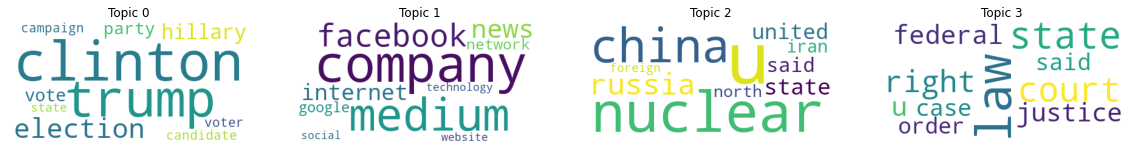

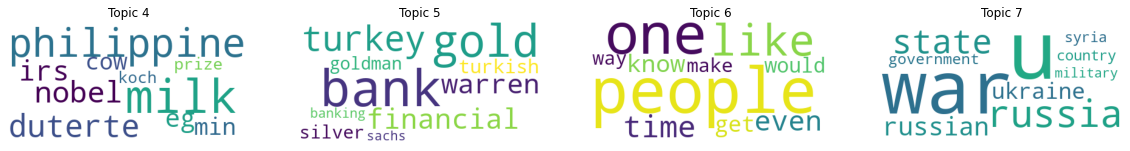

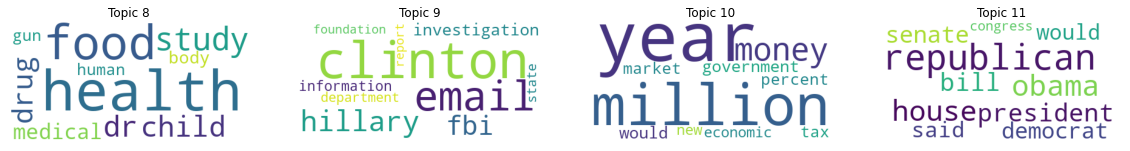

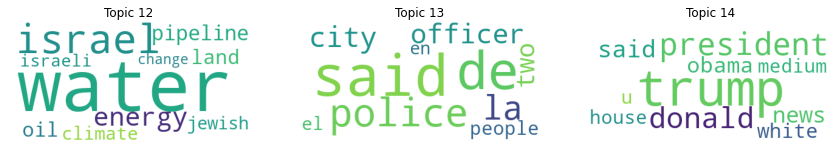

In [103]:
for i, topic in lda.show_topics(num_topics=15, num_words=10, formatted=False):
    if i % 4 == 0:
        plt.figure(figsize=(20, 10))
    plt.subplot(1, 4, (i % 4) + 1)
    wordcloud = WordCloud(background_color="white").fit_words(dict(topic))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {i}")
    if (i + 1) % 4 == 0 or i == 15 - 1:
        plt.show()